<a href="https://colab.research.google.com/github/berndheidemann/notebooks_fastai/blob/master/for_and_backward_propagation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward propagation zu Fuß

In [0]:
import numpy as np

y = 5

x = np.array([-1, 2, 0])

w1 = np.array(
     [[0, -2, 4, -1],
      [3, 0, -10, 1],
      [1, -1, -2, 1]])

w2 = np.array([2,1,2,-2])

def relu(a):
  return np.maximum(a, 0)

In [0]:
z2=x@w1; z2

array([  6,   2, -24,   3])

In [0]:
a2 = relu(z2);a2

array([6, 2, 0, 3])

In [0]:
z3=w2.T@a2; z3

8

In [0]:
yhat=z3; yhat

8

In [0]:
loss = (y-yhat)**2; loss

9

In [0]:
#oder in einem ausdruck:
loss = (y-relu(x@w1)@w2)**2; loss

9

# Ein vollständiges neuronales Netz inklusive Backpropagation mit minimaler Unterstützung von Pytorch

## Vorbereitungen

In [0]:
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.tensor([-1., 2., 0.])

w1 = nn.Parameter(torch.tensor( [[0., -2., 4., -1.],
                                [3., 0., -10., 1.],
                                [1., -1., -2., 1.]]))   

w2 = nn.Parameter(torch.tensor([2.,1.,2.,-2.]))

y = 5

In [0]:
def relu(a):
  return torch.max(torch.tensor(0.), a)

In [0]:
yhat=(relu(x@w1)@w2).item(); yhat

8.0

In [0]:
loss = (y-yhat)**2; loss

9.0

## Hier kommt das eigentliche Netz

In [0]:
learnrate=0.0001

In [0]:
def train(i):
  yhat=(relu(x@w1)@w2)
  loss=(y-yhat)**2
  if i%10==0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    w1.sub_(learnrate*w1.grad)
    w2.sub_(learnrate*w2.grad)
    w1.grad.zero_()
    w2.grad.zero_()
    return loss.item()

In [0]:
losses=[]
for i in range(200):
  losses.append(train(i))

tensor(9., grad_fn=<PowBackward0>)
tensor(6.1680, grad_fn=<PowBackward0>)
tensor(4.2403, grad_fn=<PowBackward0>)
tensor(2.9221, grad_fn=<PowBackward0>)
tensor(2.0176, grad_fn=<PowBackward0>)
tensor(1.3951, grad_fn=<PowBackward0>)
tensor(0.9659, grad_fn=<PowBackward0>)
tensor(0.6694, grad_fn=<PowBackward0>)
tensor(0.4643, grad_fn=<PowBackward0>)
tensor(0.3222, grad_fn=<PowBackward0>)
tensor(0.2237, grad_fn=<PowBackward0>)
tensor(0.1554, grad_fn=<PowBackward0>)
tensor(0.1080, grad_fn=<PowBackward0>)
tensor(0.0751, grad_fn=<PowBackward0>)
tensor(0.0522, grad_fn=<PowBackward0>)
tensor(0.0363, grad_fn=<PowBackward0>)
tensor(0.0252, grad_fn=<PowBackward0>)
tensor(0.0176, grad_fn=<PowBackward0>)
tensor(0.0122, grad_fn=<PowBackward0>)
tensor(0.0085, grad_fn=<PowBackward0>)


In [0]:
yhat=(relu(x@w1)@w2).item(); yhat

8.0

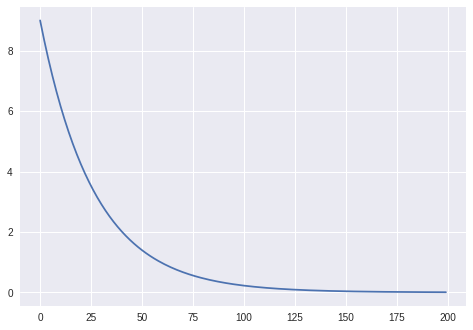

In [0]:
plt.plot(losses)
plt.show()

## Wie genau lernt das Netz hier?

Mal ohne Schleife

In [0]:
yhat=(relu(x@w1)@w2)
loss=(y-yhat)**2
loss.backward()
print(f"yhat: {yhat}")
print(f"\nloss: {loss}")
print("\n-------------------------------------")
with torch.no_grad():
  print(f"\nw1 vorher: {w1}")
  print(f"\nw1.grad (die Steigung der Funktion in Abhängigkeit der einzelnen Parameter[1. Ableitung]):\n{w1.grad}")
  print(f"\nlearnrate*w1.grad (diese Werte werden von w1 subtrahiert, was zu einer Reduzierung von loss führen sollte):\n{learnrate*w1.grad}")
  w1.sub_(learnrate*w1.grad)
  print(f"\nw1 nachher: {w1}")
  print("\n-------------------------------------")
  print(f"\nw2 vorher: {w2}")
  print(f"\nw2.grad (die Steigung der Funktion in Abhängigkeit der einzelnen Parameter[1. Ableitung])::\n{w2.grad}")
  print(f"\nlearnrate*w2.grad (diese Werte werden von w1 subtrahiert, was zu einer Reduzierung von loss führen sollte):\n{learnrate*w2.grad}")
  w2.sub_(learnrate*w2.grad)
  print(f"\nw2 nachher:\n{w2}")

  w1.grad.zero_()
  w2.grad.zero_()


yhat: 5.052557945251465

loss: 0.0027623376809060574

-------------------------------------

w1 vorher: Parameter containing:
tensor([[  0.0612,  -1.9689,   4.0000,  -1.0658],
        [  2.8775,  -0.0623, -10.0000,   1.1317],
        [  1.0000,  -1.0000,  -2.0000,   1.0000]], requires_grad=True)

w1.grad (die Steigung der Funktion in Abhängigkeit der einzelnen Parameter[1. Ableitung]):
tensor([[-0.1905, -0.0986,  0.0000,  0.2209],
        [ 0.3810,  0.1973,  0.0000, -0.4418],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])

learnrate*w1.grad (diese Werte werden von w1 subtrahiert, was zu einer Reduzierung von loss führen sollte):
tensor([[-1.9049e-05, -9.8626e-06,  0.0000e+00,  2.2091e-05],
        [ 3.8099e-05,  1.9725e-05,  0.0000e+00, -4.4181e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

w1 nachher: Parameter containing:
tensor([[  0.0612,  -1.9689,   4.0000,  -1.0659],
        [  2.8775,  -0.0623, -10.0000,   1.1317],
        [  1.0000,  -1.0000,  -2.0000,   

## Und hier mal mit einem Plot, wie sich die Werte und Gradienten von w1 und w2 ändern

In [0]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.tensor([-1., 2., 0.])

w1 = nn.Parameter(torch.tensor( [[0., -2., 4., -1.],
                                [3., 0., -10., 1.],
                                [1., -1., -2., 1.]]))   

w2 = nn.Parameter(torch.tensor([2.,1.,2.,-2.]))

def relu(a):
  return torch.max(torch.tensor(0.), a)

grad_history=[]
w_history=[]

### Verlauf der Gradienten

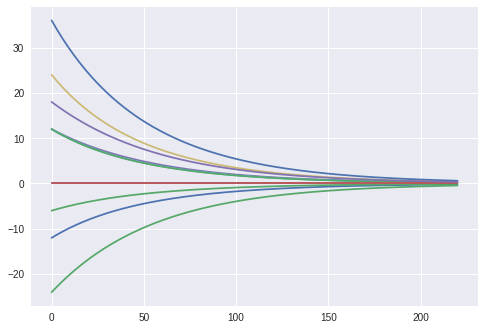

In [0]:
for i in range(100):
  yhat=(relu(x@w1)@w2)
  loss=(y-yhat)**2
  loss.backward()
  with torch.no_grad():
    w1.sub_(learnrate*w1.grad)
    w2.sub_(learnrate*w2.grad)
    grad_history.append(np.append(w1.grad.detach().numpy().flatten(), w2.grad.detach().numpy().flatten()))
    w_history.append(np.append(w1.detach().numpy().flatten(), w2.detach().numpy().flatten()))
    w1.grad.zero_()
    w2.grad.zero_()
    
plt.plot(grad_history)
plt.show()

### Verlauf der Gewichte der einzelnen Synapsen

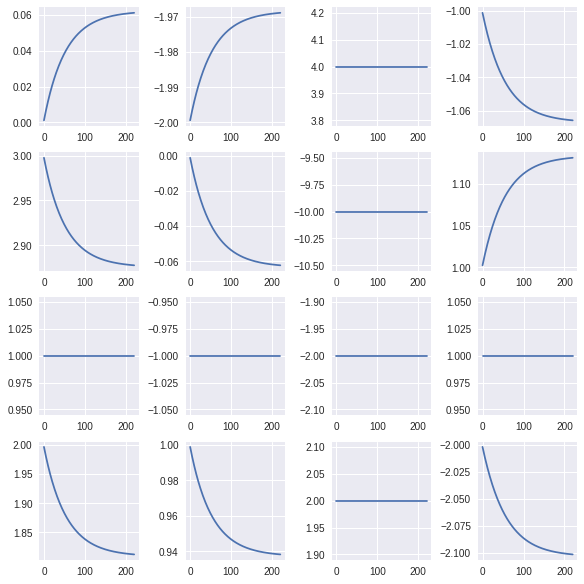

In [0]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8), constrained_layout=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(np.asarray(w_history)[:,i])
plt.show()

## Das Ganze mit vielen X und Y-Werten

In [0]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.tensor([[-1., 2., 0.],
                [4., 7., 12.],
                [3., -24., 2.],
                [-6., .9, 0.02],
                [4.1, 7.3, .2],
                [1.8, -2., 20.]])

y = torch.tensor([ [5.], 
                   [-233.],
                   [99.],
                   [44.0],
                   [0.07],
                   [0.9] ])

w1 = nn.Parameter(torch.randn(3, 30))   # Matrix mit Zufallswerten (30 Zeilen, 3 Spalten)  Hier also ein Hidden-Layer mit 30 Neuronen. Jedes Neuron ist mit allen drei Input-Neuronen verbunden

w2 = nn.Parameter(torch.randn(30, 1))   # hier die Synapsen vom Hidden-Layer zum Output-Neuron

def relu(a):
  return torch.max(torch.tensor(0.), a)

grad_history=[]
w_history=[]
losses=[]

learnrate=0.00001

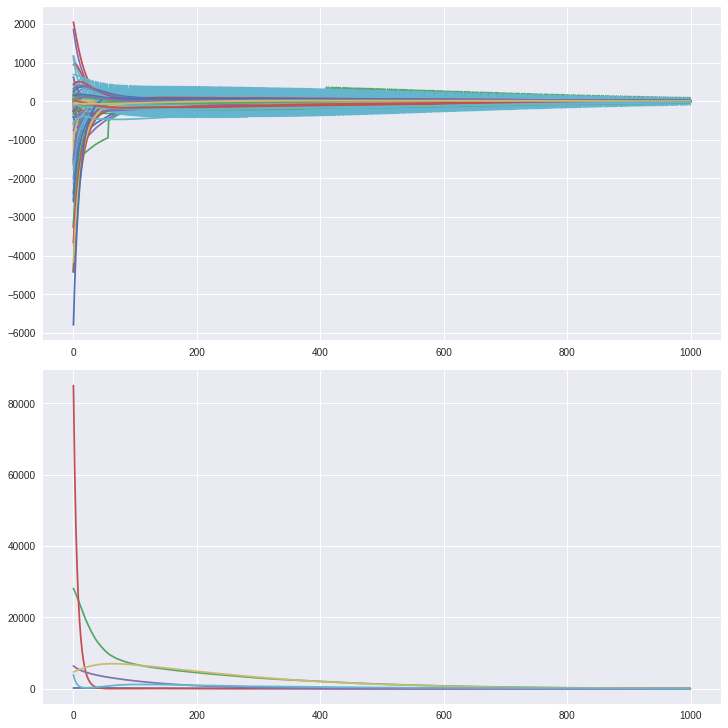

In [75]:
for i in range(1000):
  yhat=(relu(x@w1)@w2)
  loss=(y-yhat)**2
  losses.append(loss.detach().numpy())
  loss.mean().backward()
  with torch.no_grad():
    w1.sub_(learnrate*w1.grad)
    w2.sub_(learnrate*w2.grad)
    grad_history.append(np.append(w1.grad.detach().numpy().flatten(), w2.grad.detach().numpy().flatten()))
    w_history.append(np.append(w1.detach().numpy().flatten(), w2.detach().numpy().flatten()))
    w1.grad.zero_()
    w2.grad.zero_()
    
fig, axs = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)
axs[0].plot(grad_history)
axs[1].plot(np.squeeze(losses))
plt.show()

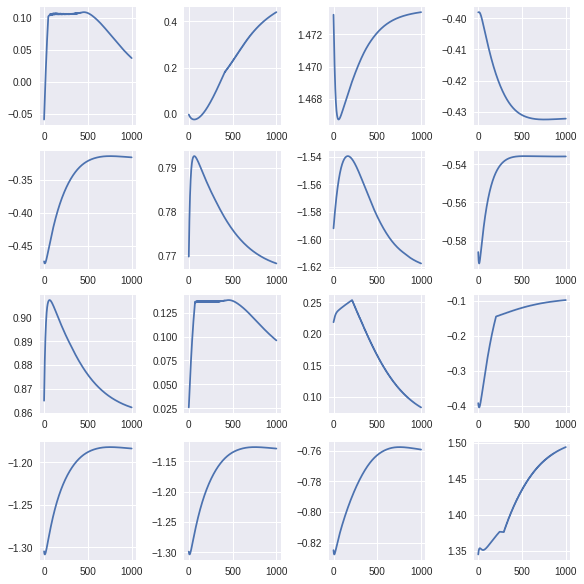

In [76]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8), constrained_layout=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(np.asarray(w_history)[:,i])
plt.show()